In [1]:
import pandas as pd
import gensim
import re
from nltk.corpus import stopwords
import pprint
from collections import defaultdict

In [2]:
## import df_proposicoes_treino.csv as dataframe
df = pd.read_csv('df_proposicoes_treino.csv')

In [3]:
## remove special characters (but keeping letters with accents), \n break lines and lowercase all words in 'ementa_do_pdf_1pag'
df['ementa_do_pdf_1pag_limpo'] = df['ementa_do_pdf_1pag_limpo'].apply(lambda x: re.sub(r'[^a-z\s]', '', x, flags=re.I).lower())
df['ementa_do_pdf_1pag_limpo'] = df['ementa_do_pdf_1pag_limpo'].apply(lambda x: re.sub(r'\\n', '', x))
df['ementa_tokens'] = df['ementa_do_pdf_1pag_limpo'].apply(lambda x: x.split())

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
import numpy as np
import nltk


vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
tfidf_matrix = vectorizer.fit_transform(df['ementa_do_pdf_1pag_limpo'])
normalizer = Normalizer()
tfidf_matrix_normalized = normalizer.fit_transform(tfidf_matrix)
num_clusters = 1  # ajuste conforme necessário
n_init_value = 'auto'  # ou 'auto'

# Aplicar K-means para clusterização
km = KMeans(n_clusters=num_clusters, n_init=n_init_value, random_state=42)
km.fit(tfidf_matrix_normalized)

# Imprimir os clusters e as proposições em cada cluster
clusters = km.labels_.tolist()
for i in range(num_clusters):
    print(f"Cluster {i+1}:")
    for j in range(len(clusters)):
        if clusters[j] == i:
            print(f"Proposição {j+1}: {df['ementa_do_pdf_1pag_limpo'][j]}")
    print()

Cluster 1:
Proposição 43: deputado paulo magalhes relator entra vigor art  fica aprovado ato previsto portaria n maio ministrio comunicaes renova dez anos partir maio autorizao outorgada associao comunitria ao cidadania desenvolvimento social cultural artstico executar direito exclusividade servio radiodifuso comunitria municpio iau estado bahia art  este decreto legislativo entra vigor data publicao sala comisso junho congresso nacional decreta nacional decreta aprova f ato renova autorizao outorgada associao comunitria ao e cidadania desenvolvimento social cultural artstico executar servio radiodifuso comunitria municpio iau estado bahia l b de
Proposição 72: deputada ana paula lima l relatora e entra vigor legislativo entra vigor art  fica aprovado ato previsto portaria n maio ministrio comunicaes renova dez anos partir novembro autorizao outorgada associao cultural salto veloso executar sem direito exclusividade servio radiodifuso comunitria municpio salto veloso estado santa catar

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

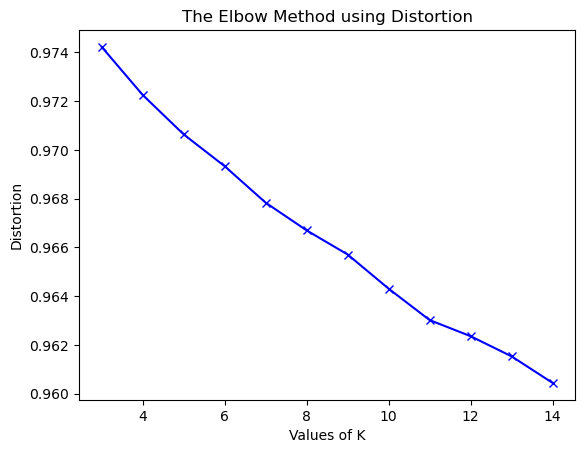

In [8]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(3, 15)

X_t = np.asarray(tfidf_matrix.todense())

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X_t)
	kmeanModel.fit(X_t)

	distortions.append(sum(np.min(cdist(X_t, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X_t.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X_t, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X_t.shape[0]
	mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()